In [2]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.2.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? False


In [1]:
pip install tensorflow 

In [3]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [4]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()
x_train,y_train=get_three_classes(x_train,y_train)
x_test,y_test=get_three_classes(x_test,y_test)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

170500096/170498071 [==============================] - 157s 1us/step
(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


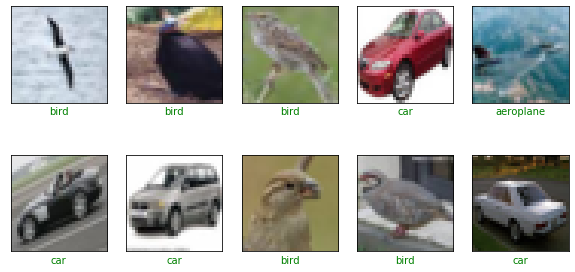

In [5]:
class_names = ['aeroplane', 'car', 'bird']
def show_random_examples(x,y,p):
    indices=np.random.choice(range(x.shape[0]),10,replace=False)
    x=x[indices]
    y=y[indices]
    p=p[indices]
    plt.figure(figsize=(10,5))
    for i in range(10):
        plt.subplot(2,5,1+i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col='green' if np.argmax(y[i])==np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])],color=col)
    plt.show()
show_random_examples(x_train,y_train,y_train)

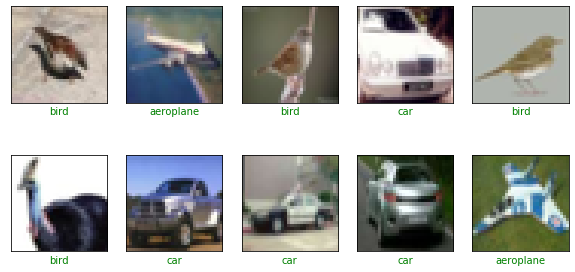

In [8]:
show_random_examples(x_train,y_train,y_train)

In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense
def create_model():
    def add_conv_block(model,num_filters):
        model.add(Conv2D(num_filters,3,activation='relu',padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters,3,activation='relu'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.5))
        return model
    model=tf.keras.models.Sequential()
    model.add(Input(shape=(32,32,3)))
    model=add_conv_block(model,32)
    model=add_conv_block(model,64)
    model=add_conv_block(model,128)
    model.add(Flatten())
    model.add(Dense(3,activation='softmax'))
    
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',metrices=['accuracy']
    )
    return model


In [16]:
model=create_model()
model.summary()

TypeError: Invalid keyword argument(s) in `compile`: {'metrices'}

In [17]:
h=model.fit(x_train/255,y_train,validation_data=(x_test/255.,y_test),epochs=10,batch_size=128,
           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3),
           tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:3f}.h5',
           save_best_only=True,sace_weights_only=False,
           monitor='val_accuracy'  
            )])

NameError: name 'model' is not defined

In [ ]:
accs=h.history['accuracy']
val_accs=h.history['val_accuracy']
plt.plot(range(len(accs)),accs,label='Training')
plt.plot(range(len(accs)),val_accs,label='Validation')
plt.legend()
plt.show()

In [ ]:
model=tf.keras.models.load_model('model/model_0.880.h5')

In [18]:
preds=model.predict(x_test/255.)

NameError: name 'model' is not defined

In [19]:
show_random_examples(x_test,y_test,preds)

NameError: name 'preds' is not defined